# Three Qubit Rotation Coefficient function

We will use the following two qubit gate set to generate a three qubit rotation:
$$R_{ijk}^{zyx}(\phi) = R_{ij}^{zx}(\theta)R_{jk}^{zx}(\theta)R_{ij}^{zx}(-\theta-\lambda)R_{jk}^zx(-\theta+\tau)$$
Here I will write a function that returns $\theta$, $\lambda$, and $\tau$ given $\phi$ assuming that 
$$R_{ijk}^{zyx}(\phi) = \cos(\phi)+i \sin(\phi) ZYX$$

In [1]:
from qiskit import quantum_info as qi
import numpy as np
import pandas as pd

From the mathematica file: C:\Users\jsten\Documents\Reaserch\Quantum Gates\Three_Site_Rotation\Three_Site_Rotation2

I generated the following set of $\theta$, $\lambda$, and $\tau$ values that work together (i.e. these make the two qubit terms cancel).  From these we need to figure out what $\phi$ values we get.

In [46]:
angles = []
f = open("angles.txt", "r")
lines = f.readlines()
for line in lines:
    line = line.replace('{','')
    line = line.replace('}','')
    line = line.replace('\n','')
    line = line.replace('*^', 'e')
    angle_l = line.split(',')
    angle_n = [float(angle_l[i]) for i in range(0,3)]
    angles.append(angle_n)
f.close()
angles = np.array(angles)

The result of the two qubit get set can be writen in terms of coefficients for each type of operator:
$$ R_{ij}^{zx}(\theta)R_{jk}^{zx}(\theta)R_{ij}^{zx}(-\theta-\lambda)R_{jk}^zx(-\theta+\tau) = a(\theta,\lambda,\tau)+i b(\theta,\lambda,\tau) Z_i X_j + i c(\theta,\lambda,\tau) Z_j X_k - i d(\theta,\lambda,\tau) Z_i Y_j X_k $$

these coeficients are defined below.

In [74]:
def a(angle):
    h = angle[0]
    l = angle[1]
    t = angle[2]
    a1 = np.cos(-h+t)*np.cos(-h-l)*np.cos(h)*np.cos(h)
    a2 = np.sin(-h+t)*np.cos(-h-l)*np.sin(h)*np.cos(h)
    a3 = np.sin(-h+t)*np.sin(-h-l)*np.sin(h)*np.sin(h)
    a4 = np.cos(-h+t)*np.sin(-h-l)*np.cos(h)*np.sin(h)
    return a1 - a2 - a3 - a4

def b(angle):
    h = angle[0]
    l = angle[1]
    t = angle[2]
    b1 = np.cos(-h+t)*np.cos(-h-l)*np.cos(h)*np.sin(h)
    b2 = np.sin(-h+t)*np.cos(-h-l)*np.sin(h)*np.sin(h)
    b3 = np.cos(-h+t)*np.sin(-h-l)*np.cos(h)*np.cos(h)
    b4 = np.sin(-h+t)*np.sin(-h-l)*np.sin(h)*np.cos(h)
    return b1 - b2 + b3 + b4

def c(angle):
    h = angle[0]
    l = angle[1]
    t = angle[2]
    b1 = np.cos(-h+t)*np.cos(-h-l)*np.sin(h)*np.cos(h)
    b2 = np.sin(-h+t)*np.cos(-h-l)*np.cos(h)*np.cos(h)
    b3 = np.cos(-h+t)*np.sin(-h-l)*np.sin(h)*np.sin(h)
    b4 = np.sin(-h+t)*np.sin(-h-l)*np.cos(h)*np.sin(h)
    return b1 + b2 + b3 - b4

def d(angle):
    h = angle[0]
    l = angle[1]
    t = angle[2]
    b1 = np.cos(-h+t)*np.cos(-h-l)*np.sin(h)*np.sin(h)
    b2 = np.sin(-h+t)*np.cos(-h-l)*np.cos(h)*np.sin(h)
    b3 = np.cos(-h+t)*np.sin(-h-l)*np.sin(h)*np.cos(h)
    b4 = np.sin(-h+t)*np.sin(-h-l)*np.cos(h)*np.cos(h)
    return b1 + b2 - b3 + b4



In [76]:
#Check that b = c = 0 and that a^2 + d^2 = 1
print(a(angles[30]))
print(b(angles[30]))
print(c(angles[30]))
print(d(angles[30]))
print(a(angles[30])**2 + d(angles[30])**2 )

0.9828383769113072
1.5265566588595902e-16
1.700029006457271e-16
0.18446876394215644
0.9999999999999997


Now we would like a function which takes $\phi$ as an input and returns the $\theta$, $\lambda$, and $\tau$ such that $a(\theta,\lambda, \tau) = \cos(\phi)$.  To do this, let us create a dictionary which mapes $\phi$ to an index of the angles.

In [96]:
phi_to_theta = {np.arccos(a(angles[i])):i for i in range(0,len(angles))}
def theta(phi):
    key = min(phi_to_theta.keys(), key=lambda k: abs(k-phi)) #finds the closest key to the desired angle
    index = phi_to_theta[key]
    return angles[index]

Now we can check that $a(\theta,\lambda, \tau) = \cos(\phi)$

In [106]:
import matplotlib.pyplot as plt

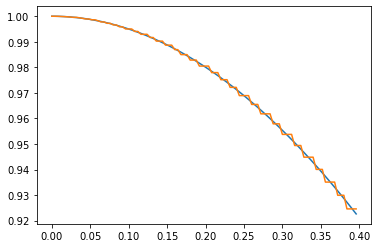

In [118]:
dphi = 0.004
phi_l = [phi_i*dphi for phi_i in range(0,100)]
a_l = [a(theta(phi_i*dphi)) for phi_i in range(0,100)]
cos_l = [np.cos(phi_i*dphi) for phi_i in range(0,100)]

plt.plot(phi_l,cos_l)
plt.plot(phi_l,a_l)

We should also have $d(\theta,\lambda, \tau) = \sin(\phi)$ which should be guarenteed but we can still check

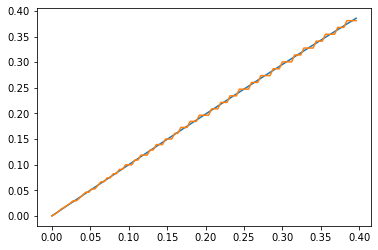

In [124]:
d_l = [d(theta(phi_i*dphi)) for phi_i in range(0,100)]
sin_l = [np.sin(phi_i*dphi) for phi_i in range(0,100)]

plt.plot(phi_l,sin_l)
plt.plot(phi_l,d_l)

As a final sanity check can make sure that the coefficients are correct by checking $$ R_{ij}^{zx}(\theta)R_{jk}^{zx}(\theta)R_{ij}^{zx}(-\theta-\lambda)R_{jk}^zx(-\theta+\tau) = a(\theta,\lambda,\tau)+i b(\theta,\lambda,\tau) Z_i X_j + i c(\theta,\lambda,\tau) Z_j X_k - i d(\theta,\lambda,\tau) Z_i Y_j X_k $$
To do this we will need to define the Pauli operators and the rotation gates.  I will use the quantum information package from qiskit.


In [177]:
Z0 = qi.Operator.from_label('IIZ').data
Z1 = qi.Operator.from_label('IZI').data
X1 = qi.Operator.from_label('IXI').data
X2 = qi.Operator.from_label('XII').data
Y1 = qi.Operator.from_label('IYI').data
I0 = qi.Operator.from_label('III').data

def R01(theta):
    return np.cos(theta)*I0 + 1j*np.sin(theta)*np.dot(Z0,X1)

def R12(theta):
    return np.cos(theta)*I0 + 1j*np.sin(theta)*np.dot(Z1,X2)

# A function which takes the matrix multiplication of a list of operators
def Mdot(O):
    m_out = O[0]
    for i in range(1,len(O)):
        m_out = np.dot(O[i],m_out)
    return m_out

In [193]:
h = 0.3
l = 0.04
t = 0.1
tst = a([h,l,t])*I0 + 1j*b([h,l,t])*Mdot([Z0,X1]) + 1j*c([h,l,t])*Mdot([Z1,X2]) - 1j*d([h,l,t])*Mdot([Z0,Y1,X2]) - Mdot([R01(h),R12(h),R01(-h-l),R12(-h+t)])
np.amax(tst)

(1.1102230246251565e-16+0j)